#### Jérémy TREMBLAY

# TP0 : Introduction 

In [7]:
# Import the library that will be used in this notebook.
import pandas as pd
import numpy as np
import random
import math

# Import the pyplot module from matplotlib with the plt alias.
import matplotlib.pyplot as plt

## Task 1 : Display 10 random notes

**Consigne :** Utilisez la fonction `randint` de la librairie `random` pour générer 10 notes d’étudiants aléatoires
entre 0 et 20 que vous stocker dans une liste.  
Proposez deux manières de réaliser cette tâche :
* À partir d’une boucle : à l’aide de la fonction range.
* À partir d’une liste en compréhension

In [8]:
numbers = []

# With a for loop.
for i in range (10):
    numbers.append(random.randint(0, 20))
print(numbers)

# Clear the collection.
numbers.clear()

# With an online declaration.
numbers = [random.randint(0, 20) for x in range(10)]
print(numbers)

[2, 16, 19, 11, 8, 19, 3, 4, 2, 1]
[16, 18, 13, 5, 5, 17, 4, 9, 19, 13]


## Task 2 : Dislay graph and notes

**Consigne :** Calculez de manière itérative la moyenne obtenue pour toute nouvelle note aléatoire ajoutée :
* Vous pouvez définir une fonction qui calcule la moyenne à partir d’une liste.
* Affichez ensuite l’évolution des moyennes successives obtenues pour chaque nouvelle note ajoutée,
de 1 à 10000, à l’aide de la librairie `matplotlib`.
* On fixe la graine aléatoire (seed) de la librairie `random` à 20

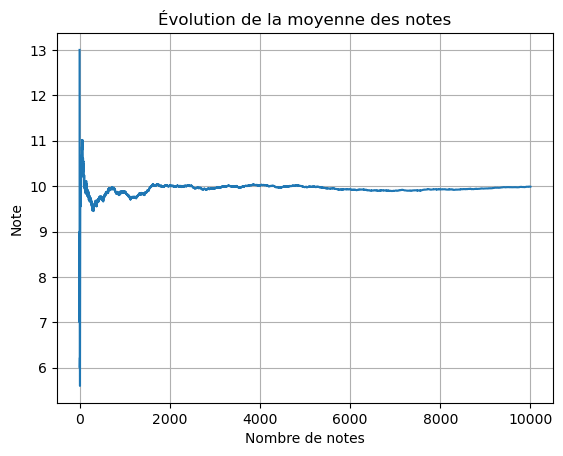

In [9]:
# Set the seed.
random.seed = 20

# Define a function to return the average of the values contained in a list.
def average(liste):
    """
    Calculate the average of a list of numbers.

    Parameters:
    liste (list of int/float): A list containing numerical values.

    Returns:
    float: The average value of the numbers in the list. Returns 0 if the input list is empty.
    """
    return sum(liste) / len(liste)

n = 10000 # Total number of marks.

# Generate random marks with an online declaration like before.
marks = [random.randint(0, 20) for _ in range(n)]
    
averages = [] # Contains all the average marks.
cumulative_marks = [] # Contains all the marks, they will be added one by one in this collection.

# Iterates through marks and compute some values.
for i, mark in enumerate(marks, start=1):
    cumulative_marks.append(mark)
    # Compute a new average based on the cumulative marks and add it to the collection.
    avg = average(cumulative_marks)
    averages.append(avg)

# Display data on a graph.
plt.plot(range(1, n + 1), averages)
plt.xlabel('Nombre de notes')
plt.ylabel('Note')
plt.title('Évolution de la moyenne des notes')
plt.grid(True)

## Task 3 : Dislay notes and averages

**Consigne :** Ajoutez la moyenne calculée sur les 100 dernières notes obtenues (en fixant de nouveau la graine aléatoire à 20).

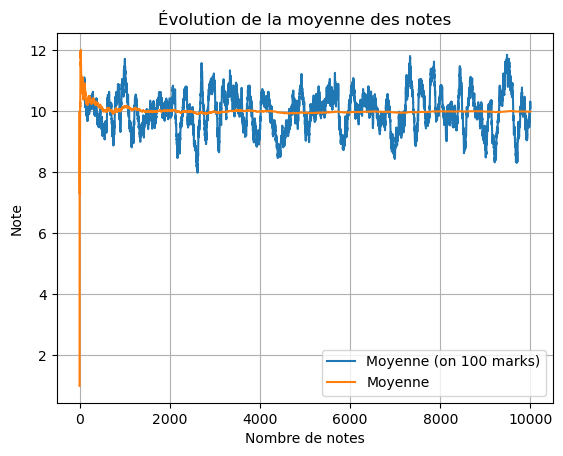

In [10]:
# Set the seed.
random.seed = 20

## The function is already defined.

n = 10000 # Total number of marks.

# Generate random marks with an online declaration like before.
marks = [random.randint(0, 20) for _ in range(n)]

averages = [] # Contains all the average marks.
cumulative_marks = [] # Contains all the marks, they will be added one by one in this collection.
last_100_averages = [] # Only contains the average of the last 100 marks.

# Like before, iterates through marks and compute some values.
for i, mark in enumerate(marks, start=1):
    cumulative_marks.append(mark)
    # Same process as before.
    avg = average(cumulative_marks)
    averages.append(avg)
    
    # Compute the average of the last 100 marks.
    if i >= 100:
        last = average(cumulative_marks[i - 100:i]) # get the average of the last 100 marks ONLY.
        last_100_averages.append(last) # Add the average to the collection.

# Display data
plt.plot(range(100, n + 1), last_100_averages, label='Moyenne (on 100 marks)') # Display average last 100 marks.
plt.plot(range(1, n + 1), averages, label='Moyenne') # Display cumulative average.
plt.xlabel('Nombre de notes')
plt.ylabel('Note')
plt.title('Évolution de la moyenne des notes')
plt.legend()
plt.grid(True)

## Task 4 : Random data from a function

**Consigne :** Vous allez écrire une fonction qui pour toute donnée x fournit `f(x) = sin(x) / (x + 1)` (utiliser la librairie `math`).  
Générez ensuite 20 points de cette fonction pour des valeurs aléatoires (d’une loi uniforme) de x dans l’intervalle [0, 10]. La seed peut-être de nouveau fixée à 20.

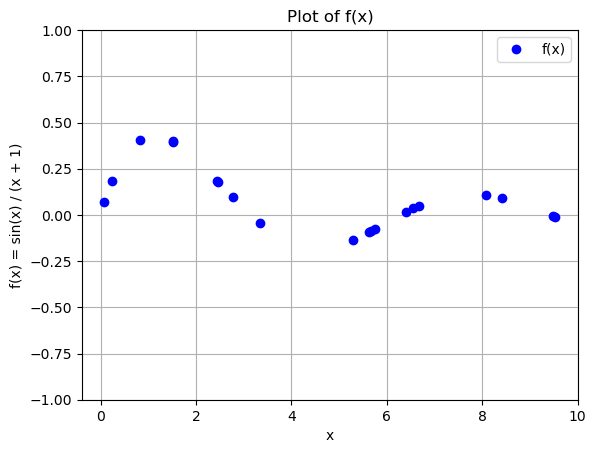

In [11]:
# Set the seed.
random.seed = 20

# Define the function f.
def f(x):
    """
    Calculate the result of the function f(x) = sin(x) / (x + 1).

    Parameters:
    x (float): The input value.

    Returns:
    float: The result of the function for the given input x. If x is equal to -1, the result is 0 to avoid DivisionByZeroException.
    """
    # Avoid DivisionByZeroException.
    if x == -1:
        return 0 
    return math.sin(x) / (x + 1) # Return result.

# Generate 20 points of the function for random value of x in the range [0, 10].
number_of_points = 20

# Use the uniform law to generate 20 random points.
x_values = [random.uniform(0, 10) for _ in range(number_of_points)]

# Call the function for each of these points (values), and store data in a list.
f_values = [f(x) for x in x_values]
    
# Plot the results.
plt.plot(x_values, f_values, 'bo', label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x) = sin(x) / (x + 1)')
plt.title('Plot of f(x)')
plt.ylim(-1, 1)  # Set y-axis limits to [-1; 1].
plt.legend()
plt.grid(True)
plt.show()

## Task 5 : Adding a Gaussian Noise

**Consigne :** Vous allez ajouter un bruit gaussien de moyenne 0 et de variance 0.5 à chaque valeur *f(x)* calculée.

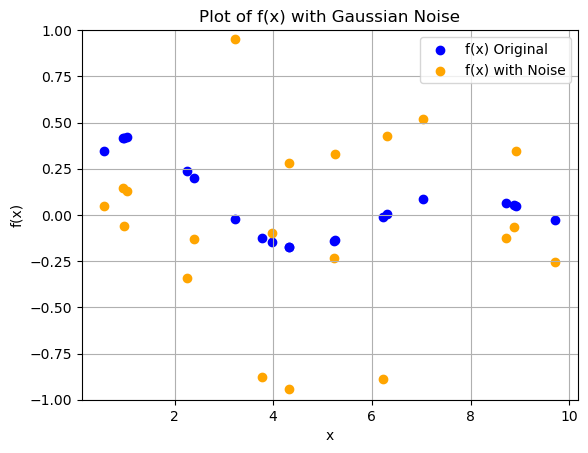

In [12]:
# Set the random seed again.
random.seed = 20

# The function is already defined.

# Generate 20 points of the function for random values of x in the range [0, 10].
number_of_points = 20
x_values = [random.uniform(0, 10) for _ in range(number_of_points)]
f_original = [f(x) for x in x_values] # Data without noise.
# Here is the difference : we add a gaussian noise by using the gauss function from the random module.
f_values = [f(x) + random.gauss(0, 0.5) for x in x_values]

# Plot just the points with y-axis limits from -1 to 1.
plt.scatter(x_values, f_original, color='blue', marker='o', label='f(x) Original')
plt.scatter(x_values, f_values, color='orange', marker='o', label='f(x) with Noise')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) with Gaussian Noise')
plt.ylim(-1, 1)
plt.legend()
plt.grid(True)
plt.show()